# **Algorithmic Methods of Data Mining - Winter Semester 2023**

## **Research questions (RQs)**
1. [__RQ1__] *Exploratory Data Analysis (EDA)* - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.


2. [__RQ2__] *Let’s finally dig into this vast dataset, retrieving some vital information:*
    - Plot the number of books for each author in descending order.
    - Which book has the highest number of reviews?
    - Which are the top ten and ten worst books concerning the average score?
    - Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.
    - How many books have more than 250 pages?
    - Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).
3. [__RQ3__] *Let’s have a historical look at the dataset!*

    - Write a function that takes as input a year and returns as output the following information:

       - The number of books published that year.
   
       - The total number of pages written that year.
   
       - The most prolific month of that year.
   
       - The longest book written that year.
   
    - Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.
   
    - Ask **ChatGPT** or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it. 

4. [__RQ4__] *Quirks questions about consistency*. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.
     - You should be sure there are no **eponymous** (different authors who have precisely the same name) in the author's dataset. Is it true?
     -  Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.
     -  What is the **longest book title** among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?
     -  What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.
       
5. [__RQ5__] *We can consider the authors with the most fans to be influential. Let’s have a deeper look.*
   - Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?
   - Have they published any series of books? If any, extract the longest series name among these authors.
   - How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it. 
   - Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:
     
         - https://bhm.scholasticahq.com/article/38021
     
         - https://priyanka-ddit.medium.com/how-to-deal-with-imbalanced-dataset-86de86c49
     
         - https://compass.onlinelibrary.wiley.com/doi/10.1111/soc4.12962
     You can even ask ChatGPT or any other LLM chatbot tool: try to formulate a prompt that provides helpful information about it. Put that information in your notebook and provide comments on what you found.
     
6. [__RQ6__] *For this question, consider the top 10 authors concerning the number of fans again.*
   - Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?
   - For each of the authors, give a convenient plot showing how many books has the given author published **UP TO** a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

7. [__RQ7__] *Estimating probabilities is a core skill for a data scientist: show us your best!*
   - Estimate the probability that a book has over 30% of the ratings above 4.
   - Estimate the probability that an author publishes a new book within two years from its last work.
   - In the file [*list.json*](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries?select=list.json), you will find a peculiar list named **"The Worst Books of All Time."** Estimate the probability of a book being included in this list, knowing it has more than 700 pages.
   - Are the events *X=’Being Included in The Worst Books of All Time list’* and *Y=’Having more than 700 pages’* independent? Explain how you have obtained your answer.

8. [__RQ8__] *Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.*
   - Can you demonstrate that readers usually rate the longest books as the worst?
   - Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?
   - About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.
   - It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit *lazy*. Confirm or reject this with a convenient statistical test or a predictive model.
   - Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

### Bonus points

**1.**

- Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload [authors.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) dataset, and filter authors with at least 100 reviews. Do the same using Pandas and compare performance in terms of milliseconds.

- Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload [books.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries), and join them with [authors.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) based on author_id. How many books don’t have a match for the author?

**2.** *Every book should have a field named description, and any author should have a field named description. Choose one of the two and perform a text-mining analysis:*

- If you choose to text-mine [**books.json**](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) **’ descriptions**, try to find a way to group books in genres using whatever procedure you want, highlighting words that are triggers for these choices.

- If you choose to text-mine [**authors.json**](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries)**’ about-field**, try to find a way to group authors in genres using whatever procedure you want, highlighting words that are triggers for these choices.

- If you feel comfortable and did **both** tasks, analyze the matching of the two procedures. You grouped books and authors in genres. Do these two procedures show correspondence?

### **1.[__RQ1__] Exploratory Data Analysis (EDA)**

### **2. [__RQ2__] Let’s finally dig into this vast dataset, retrieving some vital information:**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df_authors = pd.read_json("dataset/lighter_authors.json", lines=True)

In [16]:
df_authors.info()
df_authors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [17]:
print(df_authors.isnull().sum())

ratings_count         0
average_rating        0
text_reviews_count    0
work_ids              0
book_ids              0
works_count           0
id                    0
name                  0
gender                0
image_url             0
about                 0
fans_count            0
dtype: int64


In [26]:
df_authors = df_authors[df_authors["works_count"] == df_authors["work_ids_length"]]
df_authors.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count,work_ids_length,book_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826,106,106
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144,75,75
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60,14,14
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72,45,45
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179,61,61


In [27]:
# Group by the author's name and sum the number of books for each author
author_books = (
    df_authors.groupby("name")["book_count"].sum().sort_values(ascending=False)
)

author_books.head()
# Plotting
author_books.plot(kind="bar", figsize=(10, 6))  # Displaying top 20 authors for clarity
plt.title("Number of Books for Each Author")
plt.ylabel("Number of Books")
plt.xlabel("Author Name")
plt.xticks([])
plt.show()

KeyboardInterrupt: 

In [4]:
import pandas as pd

chunk_size = 100000
dfs = []

with open("dataset/lighter_books.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[
            ["title", "text_reviews_count", "average_rating", "language", "num_pages"]
        ]
        dfs.append(chunk)

df_books = pd.concat(dfs, ignore_index=True)

In [5]:
idx_max_reviews_book = df_books["text_reviews_count"].idxmax()
max_reviews_book = df_books.loc[idx_max_reviews_book]

print(max_reviews_book)

title                 The Hunger Games (Hunger Games, #1)
text_reviews_count                                 174524
average_rating                                       4.32
language                                            en-US
num_pages                                                
Name: 5182806, dtype: object


In [6]:
top_10_best_books = df_books.sort_values(by="average_rating", ascending=False).head(10)
top_10_worst_books = df_books.sort_values(by="average_rating", ascending=True).head(10)

print("Top 10 best books :\n", top_10_best_books)
print("\nTop 10 worst books :\n", top_10_worst_books)

Top 10 best books :
                                                      title  \
1417207                      Techniques in Human Geography   
6153769  Theatre Arts: Fundamental Theory and Practice ...   
5874165  Mieux Vendre, vendre plus facilement, vendre t...   
2346615                                          Traite 51   
2346616                                          Traite 25   
5874160                                 Personal Pleasures   
5655932                                In Exchange Of Life   
2346624                                            Traités   
1837221  Instructor's Manual for Essentials of Anatomy ...   
3080785               the roberts family guide to miracles   

         text_reviews_count  average_rating language num_pages  
1417207                   0             5.0                209  
6153769                   0             5.0                     
5874165                   0             5.0                     
2346615                   0         

In [1]:
language_counts = df_books["language"].value_counts()

language_counts.head()

plt.figure(figsize=(10, 6))
language_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Languages in the Dataset")
plt.ylabel("")
plt.show()

NameError: name 'df_books' is not defined

In [8]:
def convert_int(value):
    try:
        return int(value)
    except (ValueError, TypeError):
        return 0


df_books.loc[:, "num_pages"] = df_books["num_pages"].apply(convert_int)
books_more_than_250_pages = df_books.loc[df_books["num_pages"] > 250]
count_books_more_than_250_pages = len(books_more_than_250_pages)

print(count_books_more_than_250_pages)

1810335


                               name  \
7646                    Chuck Dixon   
3114                       Stan Lee   
23792               Agatha Christie   
4760                   Isaac Asimov   
3201                    Enid Blyton   
1630                      Mark Waid   
3659           Brian Michael Bendis   
4053                    Peter David   
4353                     John Byrne   
3073                     Roy Thomas   
34039             Charles M. Schulz   
4360                Chris Claremont   
13203                     Jim Davis   
195108                Anton Chekhov   
198315                    Anonymous   
1310              Robert Silverberg   
185412              Edgar Allan Poe   
134502                         Osho   
1017                   Stephen King   
498                    Ray Bradbury   
729              Arthur Conan Doyle   
154290  Reader's Digest Association   
160613          Walt Disney Company   
2863                 H.P. Lovecraft   
24435                   L

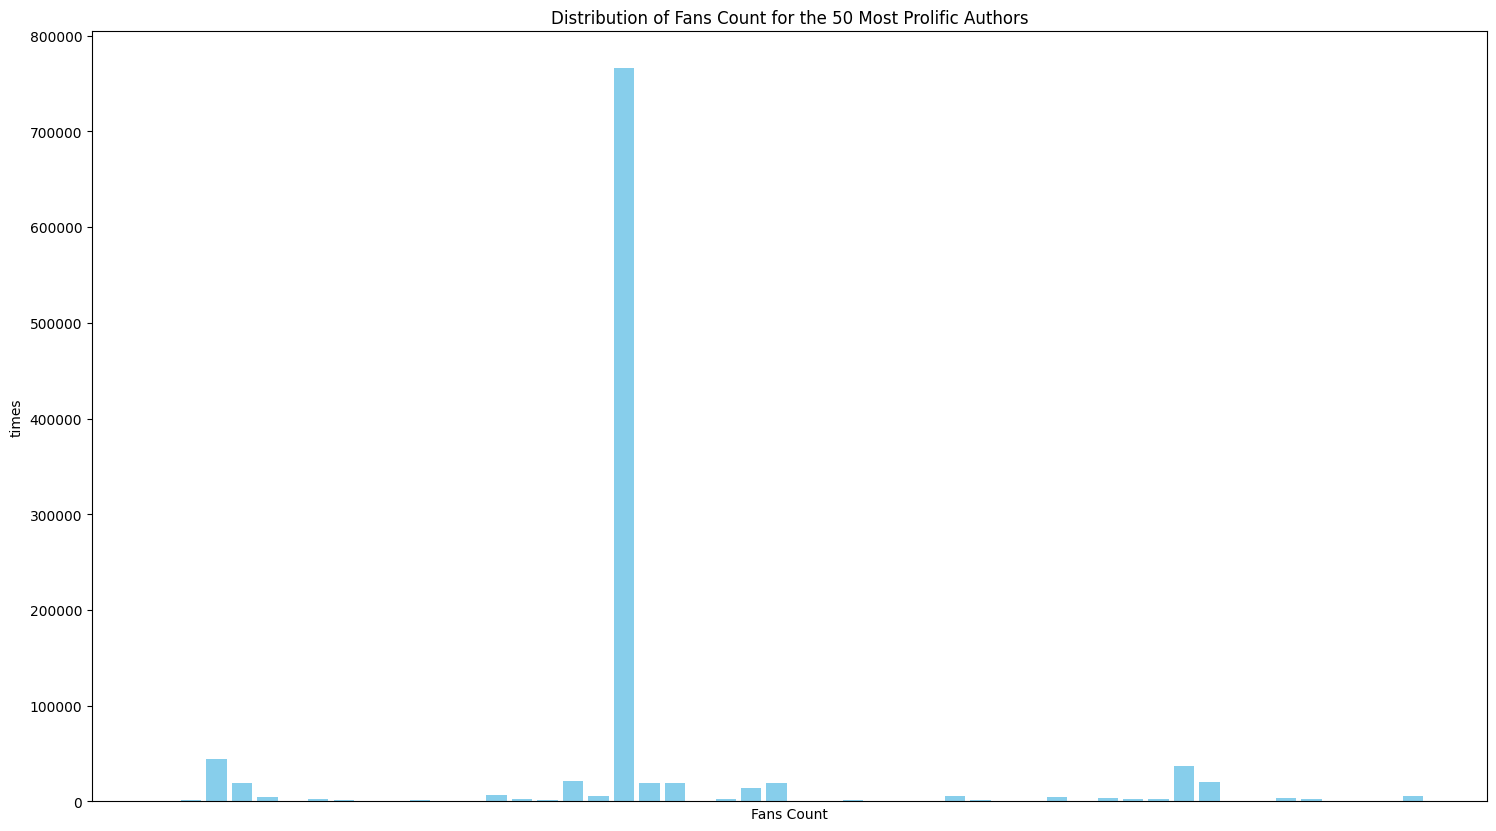

In [9]:
top_50_authors = df_authors.sort_values(by="book_ids_length", ascending=False).head(50)

print(top_50_authors)

plt.figure(figsize=(18, 10))
plt.bar(top_50_authors["name"], top_50_authors["fans_count"], color="skyblue")
plt.title("Distribution of Fans Count for the 50 Most Prolific Authors")
plt.xlabel("Fans Count")
plt.ylabel("times")
plt.xticks([])

plt.show()

### **3. [__RQ3__] Let’s have a historical look at the dataset!**

### **4. [__RQ4__] Quirks questions about consistency**

### **5. [__RQ5__] We can consider the authors with the most fans to be influential. Let’s have a deeper look.**

### **6. [__RQ6__] For this question, consider the top 10 authors concerning the number of fans again.**

### **7. [__RQ7__] Estimating probabilities is a core skill for a data scientist: show us your best!**

### **8. [__RQ8__] Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.**

### **Bonus Points**

### **1.1. Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload [authors.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) dataset, and filter authors with at least 100 reviews.**

For this task we will use Dask library. Dask is an open-source library for parallel computing in Python that's designed to scale from single machines to large clusters. It's particularly useful for working with large datasets that exceed the memory capacity of the machine but can also accelerate computations on smaller data that fits comfortably in memory by using multiple cores. Dask operations are lazy, meaning they build up a computation graph that only gets executed when you ask for a result (using compute()). This allows Dask to do optimizations and to parallelize the computations efficiently.

In [ ]:
# Libraries
import pandas as pd
import dask.dataframe as dd
import time

In [5]:
start = time.time()

df = dd.read_json("dataset/lighter_authors.json", lines=True)
result = df[df["text_reviews_count"] >= 100].compute()

end = time.time()

print("Time in ms for Dask: ", (end - start) * 1000 )

Time in ms for Dask:  24967.356204986572


In [6]:
start = time.time()

df = pd.read_json("dataset/lighter_authors.json", lines=True)
result = df[df["text_reviews_count"] >= 100]

end = time.time()

print("Time in ms for Pandas: ", (end - start) * 1000)

Time in ms for Pandas:  11315.633058547974


As we can see, Pandas library is much faster than Dask. If we closly look at the Dask, Dask dataframe is a large parallel dataframe composed of many smaller Pandas dataframes, split along the index. Operations on Dask dataframes get converted into operations on Pandas dataframes. This means that Dask dataframes rely on Pandas for many operations. However, we did not see the real advantage of Dask. Dask's real advantage comes when working with data that exceeds memory, and this dataset fits comfortably in RAM, so the real test will come with the `books.json` dataset

### **1.2. Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload [books.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries), and join them with [authors.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) based on author_id. How many books don’t have a match for the author?**

### **2. Every book should have a field named description, and any author should have a field named description. Choose one of the two and perform a text-mining analysis:**

In [1]:
# Libraries
from bs4 import BeautifulSoup
import re
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

- If you choose to text-mine [**books.json**](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) **’ descriptions**, try to find a way to group books in genres using whatever procedure you want, highlighting words that are triggers for these choices.
- If you choose to text-mine [**authors.json**](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries)**’ about-field**, try to find a way to group authors in genres using whatever procedure you want, highlighting words that are triggers for these choices.

In [2]:
# Loading dataset
chunk_size = 100000

chunks = pd.read_json('dataset/lighter_books.json', lines=True, chunksize=chunk_size)

columns_to_keep = ['id', 'title', 'authors', 'author_name', 'description']

df_list = []

for chunk in chunks:
    df_list.append(chunk[columns_to_keep])

books_df = pd.concat(df_list, ignore_index=True)


In [3]:
authors_df = pd.read_json("dataset/lighter_authors.json", lines=True)

Firstly we need to check out the data. We will look for the first ten entries for now, to see what type of text is in the `description` and `about` section.

In [4]:
pd.set_option('display.max_colwidth', 100)
books_df['description'].head(10)

0    There is a door at the end of a silent corridor. And it’s haunting Harry Pottter’s dreams. Why e...
1    Harry Potter's life is miserable. His parents are dead and he's stuck with his heartless relativ...
2    The Dursleys were so mean and hideous that summer that all Harry Potter wanted was to get back t...
3    For twelve long years, the dread fortress of Azkaban held an infamous prisoner named Sirius Blac...
4    Harry Potter is midway through his training as a wizard and his coming of age. Harry wants to ge...
5    <div>Six years of magic, adventure, and mystery make this paperback collection the perfect gift ...
6    Box Set containing Harry Potter and the Sorcerer's Stone, Harry Potter and the Chamber Of Secret...
7    Six years of magic, adventure, and mystery make this luxurious boxed set the perfect gift for Ha...
8    Seconds before the Earth is demolished to make way for a galactic freeway, Arthur Dent is plucke...
9    At last in paperback in one complete volume, here 

In [5]:
authors_df["about"].head(10)

0    Douglas Noël Adams was an English author, comic radio dramatist, and musician. He is best known ...
1    William McGuire "Bill" Bryson, OBE, FRS was born in Des Moines, Iowa, in 1951. He settled in Eng...
2    Jude Fisher is the pseudonym for <a href="https://www.goodreads.com/author/show/3842.Jane_Johnso...
3    James Hamilton-Paterson's work has been translated into many languages. He is a highly acclaimed...
4    Mark Andrew Watson (born 13 February 1980) is an English stand-up comedian and novelist.<br /><b...
5    Edith Newbold Jones was born into such wealth and privilege that her family inspired the phrase ...
6    <a target="_blank" rel="noopener nofollow" href="http://search.barnesandnoble.com/booksearch/res...
7    Although he was never a dedicated student, Paulsen developed a passion for reading at an early a...
8    Dale Peck (born 1967 on Long Island, New York) is an American novelist, critic, and columnist. H...
9    Angela Knight is an American author of mostly erot

As it can be seen, the data has HTML tags, and also a lot of stopwords that are not useful for grouping authors in genres. Let's clean the text first then we will check out the results.

In [6]:
def clean_text(text):
    soup = BeautifulSoup(str(text), "html.parser")
    text = soup.get_text()
    words = re.findall(r"\w+", text.lower())
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)


In [7]:
books_df["cleaned_description"] = books_df['description'].apply(clean_text)
books_df["cleaned_description"].head(10)

/tmp/ipykernel_3663/2922271464.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(str(text), "html.parser")


0    door end silent corridor haunting harry pottter dreams else would waking middle night screaming ...
1    harry potter life miserable parents dead stuck heartless relatives force live tiny closet stairs...
2    dursleys mean hideous summer harry potter wanted get back hogwarts school witchcraft wizardry pa...
3    twelve long years dread fortress azkaban held infamous prisoner named sirius black convicted kil...
4    harry potter midway training wizard coming age harry wants get away pernicious dursleys go inter...
5    six years magic adventure mystery make paperback collection perfect gift harry potter fans ages ...
6    box set containing harry potter sorcerer stone harry potter chamber secrets harry potter prisone...
7    six years magic adventure mystery make luxurious boxed set perfect gift harry potter fans ages f...
8    seconds earth demolished make way galactic freeway arthur dent plucked planet friend ford prefec...
9    last paperback one complete volume five novels dou

In [8]:
authors_df["cleaned_about"] = authors_df["about"].apply(clean_text)
authors_df["cleaned_about"].head(10)

/tmp/ipykernel_3663/2922271464.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(str(text), "html.parser")


0    douglas noël adams english author comic radio dramatist musician best known author hitchhiker gu...
1    william mcguire bill bryson obe frs born des moines iowa 1951 settled england 1977 worked journa...
2    jude fisher pseudonym jane johnson publisher harpercollins science fiction fantasy list voyager ...
3    james hamilton paterson work translated many languages highly acclaimed author non fiction books...
4    mark andrew watson born 13 february 1980 english stand comedian novelist watson born bristol wel...
5    edith newbold jones born wealth privilege family inspired phrase keeping joneses youngest three ...
6    http search barnesandnoble com book luther butler lives stephenville texas married jo branton bu...
7    although never dedicated student paulsen developed passion reading early age librarian gave book...
8    dale peck born 1967 long island new york american novelist critic columnist 2009 novel sprout la...
9    angela knight american author mostly erotic fantas

We are only interested in the base form or root of the word, so we will apply a technique called stemming, which is commonly used in NLP. It is a fast and straightforward method for grouping related words, and it suits our case well.

In [9]:
stemmer = PorterStemmer()

def apply_stemming(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)

In [10]:
books_df["stemmed_description"] = books_df["cleaned_description"].apply(apply_stemming)
books_df["stemmed_description"].head(10)

0    door end silent corridor haunt harri pottter dream els would wake middl night scream terror harr...
1    harri potter life miser parent dead stuck heartless rel forc live tini closet stair fortun chang...
2    dursley mean hideou summer harri potter want get back hogwart school witchcraft wizardri pack ba...
3    twelv long year dread fortress azkaban held infam prison name siriu black convict kill thirteen ...
4    harri potter midway train wizard come age harri want get away pernici dursley go intern quidditc...
5    six year magic adventur mysteri make paperback collect perfect gift harri potter fan age follow ...
6    box set contain harri potter sorcer stone harri potter chamber secret harri potter prison azkaba...
7    six year magic adventur mysteri make luxuri box set perfect gift harri potter fan age follow har...
8    second earth demolish make way galact freeway arthur dent pluck planet friend ford prefect resea...
9    last paperback one complet volum five novel dougla

In [11]:
authors_df["stemmed_about"] = authors_df["cleaned_about"].apply(apply_stemming)
authors_df["stemmed_about"].head(10)

0    dougla noël adam english author comic radio dramatist musician best known author hitchhik guid g...
1    william mcguir bill bryson obe fr born de moin iowa 1951 settl england 1977 work journal becam f...
2    jude fisher pseudonym jane johnson publish harpercollin scienc fiction fantasi list voyag also i...
3    jame hamilton paterson work translat mani languag highli acclaim author non fiction book includ ...
4    mark andrew watson born 13 februari 1980 english stand comedian novelist watson born bristol wel...
5    edith newbold jone born wealth privileg famili inspir phrase keep jones youngest three children ...
6    http search barnesandnobl com book luther butler live stephenvil texa marri jo branton butler fi...
7    although never dedic student paulsen develop passion read earli age librarian gave book read alo...
8    dale peck born 1967 long island new york american novelist critic columnist 2009 novel sprout la...
9    angela knight american author mostli erot fantasi 

Let's now check the most common words in the dataset and see what words are most common regarding genre. 

In [12]:
all_words_books = " ".join(books_df["stemmed_description"].iloc[:100000]).split()
word_freq_books = Counter(all_words_books)
word_freq_books

Counter({'de': 46083,
         'one': 34403,
         'book': 32275,
         'new': 30414,
         'la': 30308,
         'life': 29900,
         'world': 27713,
         'stori': 26326,
         'time': 23069,
         'work': 22323,
         'year': 20039,
         'first': 19418,
         'love': 18459,
         'live': 16683,
         'novel': 14890,
         'man': 14413,
         'author': 14140,
         'en': 14106,
         'includ': 13988,
         'que': 13755,
         'find': 13488,
         'make': 12809,
         'power': 12525,
         'two': 12478,
         'el': 12344,
         'histori': 12226,
         'war': 12105,
         'un': 11938,
         'famili': 11684,
         'american': 11458,
         'way': 11293,
         'reader': 11148,
         'take': 10589,
         'young': 10549,
         'edit': 10534,
         'come': 10490,
         'also': 10229,
         'peopl': 10146,
         'human': 9987,
         'centuri': 9783,
         'lo': 9668,
         'li

In [13]:
all_words_authors = " ".join(authors_df["stemmed_about"]).split()
word_freq_authors = Counter(all_words_authors)
word_freq_authors

Counter({'book': 218709,
         'write': 195327,
         'de': 184619,
         'work': 144325,
         'author': 141743,
         'live': 116689,
         'year': 113791,
         'univers': 110305,
         'stori': 108628,
         'publish': 107685,
         'novel': 100036,
         'time': 93150,
         'also': 92733,
         'first': 91336,
         'new': 88210,
         'one': 85640,
         'love': 82983,
         'writer': 78321,
         'la': 77926,
         'life': 75540,
         'com': 75062,
         'en': 68869,
         'award': 67822,
         'two': 62464,
         'fiction': 61498,
         'world': 61051,
         'includ': 58889,
         'born': 58110,
         'read': 56352,
         'school': 56275,
         'e': 56013,
         'children': 52815,
         'name': 51264,
         'seri': 48654,
         'www': 44742,
         'mani': 44414,
         'art': 44209,
         'studi': 43841,
         'famili': 43019,
         'http': 42573,
         'في':

We now select the most appropriate keywords that best represent the genres.

In [14]:
genre_keywords = {
    'fiction': ['novel'],
    'adventure': ['adventur'],
    'journalism': ['time magazin', 'new yorker', 'journali'],
    'childrens_books': ['children book', 'author children', 'children author', 'young adult'],
    'historical': ['histor novel', 'presid','histori', 'historical', 'ancient', 'leader','medieval', 'renaissance', 'victorian', 'account', 'political'],
    'short_stories': ['short'],
    'fantasy': ['magic', 'wizard', 'elf', 'dragon', 'kingdom', 'quest', 'mage', 'myth'],
    'science_fiction': ['scienc fiction', 'sci fi', 'starship', 'dystopian', 'galaxy', 'galaxi', 'future'],
    'romance': ['romance', 'romanc', 'love stori', 'erotic', 'erot'],
    'mystery': ['whodunit', 'mystery', 'clue', 'solve', 'detect', 'crime'],
    'thriller': ['thriller', 'suspense', 'tense', 'exciting', 'danger', 'risk'],
    'memoir': ['memoir', 'biographi', 'biography'],
    'horror': ['horror', 'ghost', 'scare', 'fright', 'terror', 'paranormal'],
    'true_stories': ['true', 'non fiction', 'nonfiction'],
    'religion': ['god', 'church', 'christian', 'muslim'],
    'education': ['curriculum', 'teach', 'academi', 'educ'],
    'scientific': ['biolog', 'neurolog', 'research'],
    'self_help': ['health','diet', 'weight loss'],
    'crime': ['crime', 'law', 'prison', 'convict'],
    'music': ['musician', 'singer', 'song', 'band', 'guitar', 'hip hop', 'jazz'],
    'art': ['artist', 'illustr', 'paint', 'photo', 'photograph'],
    'philosophical': ['thinker', 'philosoph'],
    'buisness': ['buisness', 'ceo', 'founder', 'firm', 'corpor', 'startup', 'entrepreneur', 'financ'],
    'technology': ['software', 'softwar', 'comput'],
    'fasion': ['supermodel', 'model' , 'fashion'],
    'sport': ['sport', 'sports', 'footbal', 'basketbal', 'athletics'],
    'cooking': ['chef', 'cookbook'],
    'poetry': ['poetry', 'poem'],
    'drama': ['drama']
}


And we apply them to the new column `genres`.

In [15]:
def assign_genres(text):
    text_set = set(text.split())
    genres = [genre for genre, keywords in genre_keywords.items() if any(keyword in text_set for keyword in keywords)]
    return ", ".join(genres)


In [16]:
books_df["genres"] = books_df["stemmed_description"].apply(assign_genres)

In [17]:
authors_df["genres"] = authors_df["stemmed_about"].apply(assign_genres)

In [ ]:
pd.set_option('display.max_colwidth', 10000)
books_df[["title", "stemmed_description", "genres"]].head(10)

In [18]:
authors_df[["name", "stemmed_about", "genres"]].head(10)

,name,stemmed_about,genres
0,Douglas Adams,dougla noël adam english author comic radio dramatist musician best known author hitchhik guid galaxi seri hitchhik began radio develop trilog five book sold fifteen million copi lifetim well televis seri comic book seri comput game featur film complet adam death seri also adapt live theatr use variou script earliest product use materi newli written adam known fan bop ad illeg signatur initi dna addit hitchhik guid galaxi dougla adam wrote co wrote three stori scienc fiction televis seri doctor serv script editor seventeenth season written work includ dirk gentli novel co wrote two liff book last chanc see base radio seri adam also origin idea comput game starship titan produc compani adam co found adapt novel terri jone posthum collect essay materi includ incomplet novel publish salmon doubt 2002 fan friend also knew adam environment activist lover fast car camera macintosh comput techno gizmo toward end life sought lectur topic includ technolog environ,"fiction, science_fiction, music, technology"
1,Bill Bryson,william mcguir bill bryson obe fr born de moin iowa 1951 settl england 1977 work journal becam full time writer live mani year english wife four children north yorkshir famili move new hampshir america year return live uk lost contin bill bryson hilari first travel book chronicl trip mother chevi around small town america follow neither account first trip around europ travel book includ massiv bestsel note small island 2003 world book day nation poll find book best repres modern england follow walk wood stephen katz travel companion neither made welcom reappear note big countri bill bryson also written sever highli prais book english languag includ mother tongu made america last book turn attent scienc short histori nearli everyth laud critic acclaim becam huge bestsel shortlist samuel johnson prize go win aventi prize scienc book descart scienc commun prize next book life time thunderbolt kid memoir grow 1950 america featur anoth appear old friend stephen katz octob 8 see public realli short histori nearli everyth,"historical, short_stories, memoir"
2,Jude Fisher,jude fisher pseudonym jane johnson publish harpercollin scienc fiction fantasi list voyag also involv publish jrr tolkien work mani year gabriel king written four novel co author john harrison wild road golden cat knot garden nonesuch also author offici visual companion peter jackson movi trilog lord ring sorceri rise first solo novel follow wild magic war sorceri,"fiction, fantasy"
3,James Hamilton-Paterson,jame hamilton paterson work translat mani languag highli acclaim author non fiction book includ seven tenth three mile play water well america boy studi ferdinand marco philippin gerontiu first novel whitbread award recent love monster 2001 prais sunday telegraph tantalis erudit ingeni live itali,fiction
4,Mark Watson,mark andrew watson born 13 februari 1980 english stand comedian novelist watson born bristol welsh parent younger twin sister call emma luci brother paul attend henleaz junior school bristol grammar school prize gabbler year go queen colleg cambridg studi english graduat first class honour univers member footlight contemporari stefan golaszewski tim key dan steven part revu nomin best newcom categori perrier comedi award 2001 edinburgh festiv fring also co direct revu key,
5,Edith Wharton,edith newbold jone born wealth privileg famili inspir phrase keep jones youngest three children edith spent earli year tour europ parent upon famili return unit state enjoy privileg childhood new york newport rhode island edith creativ talent soon becam obviou age eighteen written novella well witti review publish poetri atlant monthli fail engag edith marri wealthi sportsman edward wharton despit similar background share tast travel marriag success mani wharton novel chronicl unhappi marriag demand love vocat often conflict expect societi wharton first major novel hous mirth publish 1905 enjoy consider literari s

Let's now count the genres and check the results.

In [ ]:
genre_freq_books = Counter(books_df["genres"].str.split(', ').sum())
genre_freq_books

In [20]:
genre_freq_authors = Counter(authors_df["genres"].str.split(', ').sum())
genre_freq_authors

Counter({'': 144806,
         'fiction': 63399,
         'education': 43252,
         'historical': 42510,
         'art': 29132,
         'short_stories': 28094,
         'buisness': 22382,
         'romance': 21423,
         'scientific': 20162,
         'religion': 18783,
         'crime': 16546,
         'adventure': 13617,
         'fantasy': 13589,
         'music': 13161,
         'thriller': 10767,
         'horror': 10737,
         'memoir': 9643,
         'poetry': 9101,
         'mystery': 8610,
         'self_help': 8493,
         'true_stories': 7905,
         'technology': 7606,
         'sport': 6673,
         'fasion': 4873,
         'drama': 4599,
         'philosophical': 4155,
         'cooking': 2079,
         'science_fiction': 1421,
         'journalism': 2})

And now, we will plot the genre frequencies for both authors and books to visually inspect the results.

In [ ]:
def plot_genre_frequencies(genre_freq_dict, title='Genre Frequencies'):
    genres = list(genre_freq_dict.keys())
    frequencies = list(genre_freq_dict.values())

    sorted_indices = sorted(range(len(frequencies)), key=lambda k: frequencies[k], reverse=True)
    sorted_genres = [genres[i] for i in sorted_indices]
    sorted_frequencies = [frequencies[i] for i in sorted_indices]

    plt.figure(figsize=(12, 8))
    plt.barh(sorted_genres, sorted_frequencies, color=plt.cm.Paired.colors)
    plt.xlabel('Occurrences in dataset')
    plt.ylabel('Genres')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [ ]:
plot_genre_frequencies(genre_freq_books, title='Book Genre Frequencies')

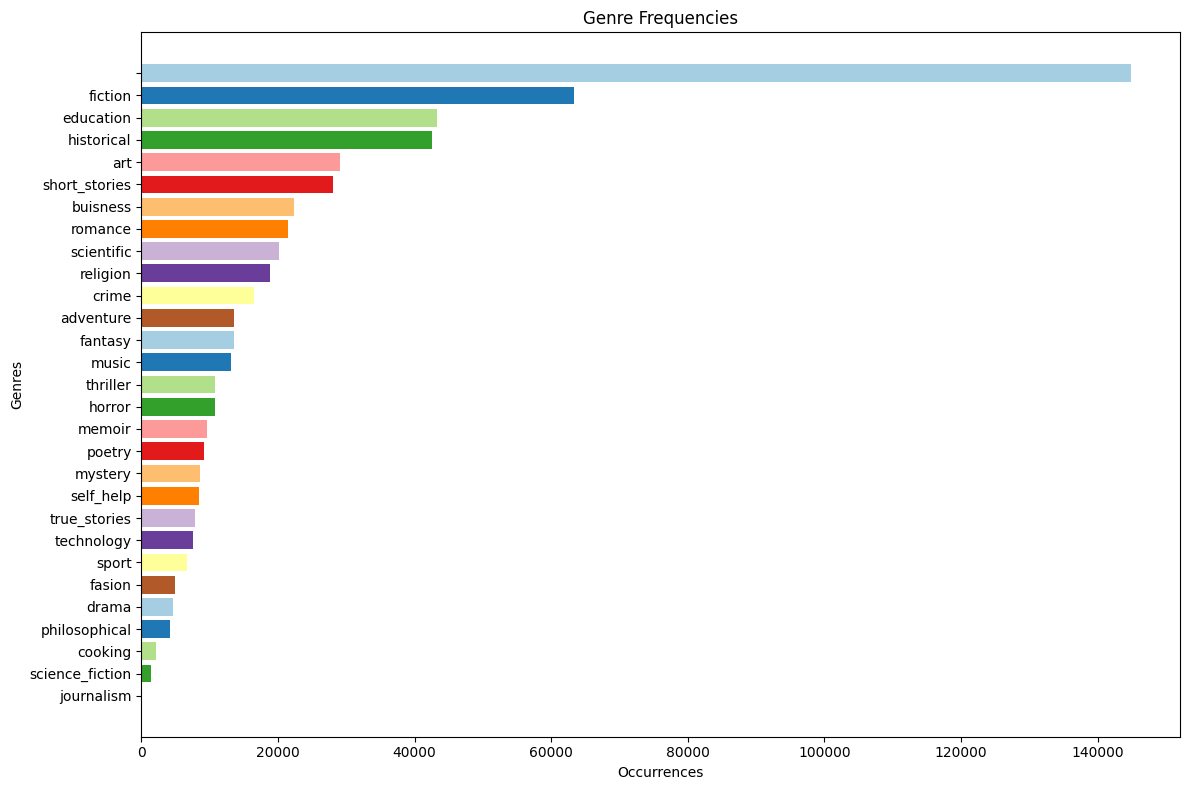

In [ ]:
plot_genre_frequencies(genre_freq_authors, title='Author Genre Frequencies')

As we observe, a significant number of entries lack genre classifications. This can be attributed to various factors, including different language, insufficient descriptions and about sections, and the potential for refining our genre keyword optimization.